# CEP: Heart Disease Detection

## Import Libraries

importing the important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

importing heart dataset

In [2]:
heartdf=pd.read_csv("heart.csv")
heartdf.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Task 1: Feature Engineering

## Preprocessing

### Dealing With Null Values

Here, we are checking the null values. In this dataset there is no null values.

In [3]:
heartdf.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Dealing with Different Data types

Here, we are checking if there is wrong data type or data type need to be changed

In [4]:
heartdf.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

### Dealing with Wrong Data

Here, we are checking if the data entered is wronged. (There is no wrong data.)

In [5]:
heartdf["Age"] = heartdf["Age"].apply(lambda x: np.nan if x == 0 else x)
heartdf["Sex"] = heartdf["Sex"].apply(lambda x: np.nan if (str(x) != 'M' and str(x) != 'F') else x)
heartdf["HeartDisease"] = heartdf["HeartDisease"].apply(lambda x: np.nan if (x != 0 and x != 1) else x)
heartdf.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Dealing With Duplicated Values

Here, we are checking the duplicated values.

In [6]:
heartdf.duplicated().sum()

0

### Dealing With Unique Values

Here, we are checking if there is any attribute whose unique value is 1 or manual checking wrong input.

In [7]:
for i in heartdf.columns:
    print(i+"= "+str(heartdf[i].unique()))

Age= [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
Sex= ['M' 'F']
ChestPainType= ['ATA' 'NAP' 'ASY' 'TA']
RestingBP= [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
Cholesterol= [289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 287 40

### One Hot Encoder

We are changing categorical data into numeric data.

In [8]:
encoder=OneHotEncoder(sparse_output=False)
columns_to_encode=["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]
encoded_df=pd.DataFrame(encoder.fit_transform(heartdf[columns_to_encode]),columns=encoder.get_feature_names_out(columns_to_encode))
heartdf.drop(columns_to_encode,axis=1,inplace=True)
heartdf=pd.concat([heartdf,encoded_df],axis=1)
heartdf.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


### Normalization

Here, we are normalizing the numeric data

In [9]:
scaler=StandardScaler()
heartdf[["Age","RestingBP","Cholesterol","MaxHR","Oldpeak"]]=scaler.fit_transform(heartdf[["Age","RestingBP","Cholesterol","MaxHR","Oldpeak"]])
heartdf.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,0,1.382928,-0.832432,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.478484,1.491752,-0.171961,0,0.754157,0.105664,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-1.751359,-0.129513,0.770188,0,-1.525138,-0.832432,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,-0.584556,0.302825,0.139040,0,-1.132156,0.574711,1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.051881,0.951331,-0.034755,0,-0.581981,-0.832432,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


### Feature Selection Using Corelation matrix

<AxesSubplot:title={'center':'Correlation Matrix'}>

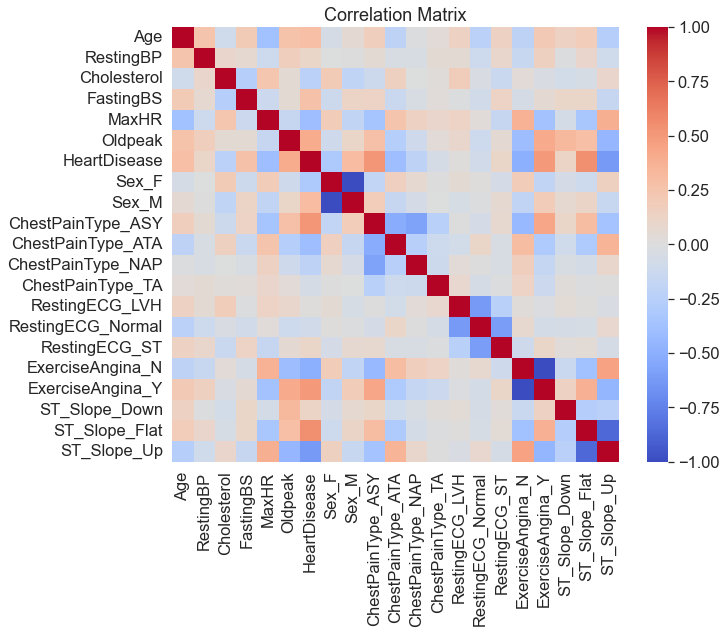

In [10]:
correlation_matrix = heartdf.corr()
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.5)
plt.title('Correlation Matrix')
sns.heatmap(correlation_matrix,cmap='coolwarm')

In [11]:
threshold = 0.10
columns_to_delete = correlation_matrix[(correlation_matrix['HeartDisease'] < threshold) & (correlation_matrix['HeartDisease'] > -threshold)].index
heartdf.drop(columns_to_delete, axis=1, inplace=True)
heartdf.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

## Model Development

### Spliting Data

Here, we split the dataset into target and features and then training and testing data. As dataset is not evenly distributed, we are using f1_score as an evalution matrix.

In [12]:
f1_score = {"KNC":0, "SVC":0, "DTC":0, "RFC":0, "LR":0}
y=heartdf["HeartDisease"]
heartdf.drop(["HeartDisease"],axis=1,inplace=True)
X=heartdf

Here, we are taking Random Forest Classifier, KNClassifier, Decision Tree, Support vector Machine and Logistic Regression as classification prediction model. We are also using gridSearchCV to predict the best parameters.

### KNeighborsClassifier

In [13]:
param_grid_KNC = {
    'n_neighbors': list(range(1,31))
}
knc = GridSearchCV(KNeighborsClassifier(), param_grid_KNC, scoring='f1', n_jobs=-1, refit=True, cv=5)
knc.fit(X, y)
model = knc.best_estimator_
y_pred = model.predict(X)
f1_score["KNC"] = knc.best_score_
print("Best Parameters:", knc.best_params_)
print(classification_report(y,y_pred))
print("Best Score:", knc.best_score_)

Best Parameters: {'n_neighbors': 13}
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       410
           1       0.88      0.91      0.89       508

    accuracy                           0.88       918
   macro avg       0.88      0.88      0.88       918
weighted avg       0.88      0.88      0.88       918

Best Score: 0.8613438739101518


### Support Vector Machine

In [14]:
param_grid_SVC = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
svc = GridSearchCV(SVC(), param_grid_SVC, scoring='f1', n_jobs=-1, refit=True, cv=5)
svc.fit(X, y)
model = svc.best_estimator_
y_pred = model.predict(X)
f1_score["SVC"] = svc.best_score_
print("Best Parameters:", svc.best_params_)
print(classification_report(y,y_pred))
print("Best Score:", svc.best_score_)

Best Parameters: {'C': 0.1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       410
           1       0.86      0.93      0.89       508

    accuracy                           0.88       918
   macro avg       0.88      0.87      0.87       918
weighted avg       0.88      0.88      0.88       918

Best Score: 0.8545210754672684


### Decision Trees

In [15]:
param_grid_DTC = {
    'criterion': ['gini', 'entropy', 'log_loss']
}
dtc = GridSearchCV(DecisionTreeClassifier(), param_grid_DTC, scoring='f1', n_jobs=-1, refit=True, cv=5)
dtc.fit(X, y)
model = dtc.best_estimator_
y_pred = model.predict(X)
f1_score["DTC"] = dtc.best_score_
print("Best Parameters:", dtc.best_params_)
print(classification_report(y,y_pred))
print("Best Score:", dtc.best_score_)

Best Parameters: {'criterion': 'entropy'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       410
           1       1.00      1.00      1.00       508

    accuracy                           1.00       918
   macro avg       1.00      1.00      1.00       918
weighted avg       1.00      1.00      1.00       918

Best Score: 0.7563187383303853


### Random Forest Classifier

In [16]:
param_grid_RFC = {
    'n_estimators': list(range(10,200,10)),
    'criterion': ['gini', 'entropy', 'log_loss']
}
rfc = GridSearchCV(RandomForestClassifier(), param_grid_RFC, scoring='f1', n_jobs=-1, refit=True, cv=5)
rfc.fit(X, y)
model = rfc.best_estimator_
y_pred = model.predict(X)
f1_score["RFC"] = rfc.best_score_
print("Best Parameters:", rfc.best_params_)
print(classification_report(y,y_pred))
print("Best Score:", rfc.best_score_)

Best Parameters: {'criterion': 'gini', 'n_estimators': 70}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       410
           1       1.00      1.00      1.00       508

    accuracy                           1.00       918
   macro avg       1.00      1.00      1.00       918
weighted avg       1.00      1.00      1.00       918

Best Score: 0.8557928678894513


### Logistics Regression

In [17]:
param_grid_LR = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}
lr = GridSearchCV(LogisticRegression(), param_grid_LR, scoring='f1', n_jobs=-1, refit=True, cv=5)
lr.fit(X, y)
model = lr.best_estimator_
y_pred = model.predict(X)
f1_score["LR"] = lr.best_score_
print("Best Parameters:", lr.best_params_)
print(classification_report(y,y_pred))
print("Best Score:", lr.best_score_)

Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       410
           1       0.87      0.90      0.88       508

    accuracy                           0.87       918
   macro avg       0.87      0.87      0.87       918
weighted avg       0.87      0.87      0.87       918

Best Score: 0.8489022210858861


### Model Comparison

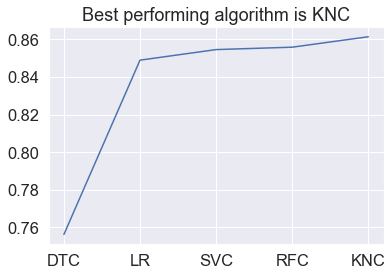

In [18]:
import matplotlib.pyplot as plt
sorted_f1_score = dict(sorted(f1_score.items(), key=lambda x:x[1]))
plt.plot(*zip(*sorted_f1_score.items()))
plt.title("Best performing algorithm is " + list(sorted_f1_score.keys())[-1])
plt.show()